In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
#loading the dataset
df= pd.read_csv("04_2017_bike_data.csv")
df.head(30)

,date,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists,Unnamed: 10
0,1-Apr,Saturday,46.0,37.0,0,606,"1,446","1,915","1,430","5,397",NaN
1,2-Apr,Sunday,62.1,41.0,0,"2,021","3,943","4,207","2,862","13,033",NaN
2,3-Apr,Monday,63.0,50.0,0.03,"2,470","4,988","5,178","3,689","16,325",NaN
3,4-Apr,Tuesday,51.1,46.0,1.18,723,"1,913","2,279","1,666","6,581",NaN
4,5-Apr,Wednesday,63.0,46.0,0,"2,807","5,276","5,711","4,197","17,991",NaN
5,6-Apr,Thursday,48.9,41.0,0.73,461,"1,324","1,739","1,372","4,896",NaN
6,7-Apr,Friday,48.0,43.0,T,"1,222","2,955","3,399","2,765","10,341",NaN
7,8-Apr,Saturday,55.9,39.9,0,"1,674","3,163","4,082","2,691","11,610",NaN
8,9-Apr,Sunday,66.0,45.0,0,"2,375","4,377","4,886","3,261","14,899",NaN
9,10-Apr,Monday,73.9,55.0,0,"3,324","6,359","6,881","4,731","21,295",NaN


In [3]:
df.tail()

,date,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists,Unnamed: 10
25,26-Apr,Wednesday,59.0,54.0,0.34,"1,247","2,774","3,429","2,369","9,819",NaN
26,27-Apr,Thursday,68.0,59.0,0,"2,959","5,311","6,026","4,285","18,581",NaN
27,28-Apr,Friday,82.9,57.9,0,"3,679","6,774","7,196","5,138","22,787",NaN
28,29-Apr,Saturday,84.0,64.0,0.06,"3,315","5,605","6,045","4,078","19,043",NaN
29,30-Apr,Sunday,64.0,54.0,0,"2,225","4,057","4,513","3,137","13,932",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 30 non-null     object 
 1   day                  30 non-null     object 
 2   temp_high            30 non-null     float64
 3   temp_low             30 non-null     float64
 4   rain_amt             30 non-null     object 
 5   brooklyn_bridge      30 non-null     object 
 6   manhattan_bridge     30 non-null     object 
 7   williamsburg_bridge  30 non-null     object 
 8   queensboro_bridge    30 non-null     object 
 9   total_cyclists       30 non-null     object 
 10  Unnamed: 10          1 non-null      object 
dtypes: float64(2), object(9)
memory usage: 2.7+ KB


In [5]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 10'], axis=1)

## Features Engineering

In [6]:
# Convert '26-Apr' format to datetime
df['date'] = pd.to_datetime(df['date'] + '-2023', format='%d-%b-%Y')

In [7]:
# Convert date to a numerical representation (e.g., number of days since the first date)
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days
df['days_since_start'].head()

0    0
1    1
2    2
3    3
4    4
Name: days_since_start, dtype: int64

In [8]:
df = df.drop(['date'], axis=1)

In [9]:
# Convert days of the week to numerical values (1 through 7)
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df['day'] = df['day'].map(day_mapping)


In [10]:
# Convert 'T' in rain_amt to a small floating-point number
df['rain_amt'] = df['rain_amt'].apply(lambda x: 0.001 if x == 'T' else float(x))
df['rain_amt']

0     0.000
1     0.000
2     0.030
3     1.180
4     0.000
5     0.730
6     0.001
7     0.000
8     0.000
9     0.000
10    0.000
11    0.020
12    0.000
13    0.000
14    0.000
15    0.001
16    0.001
17    0.000
18    0.001
19    0.170
20    0.290
21    0.110
22    0.000
23    0.001
24    0.910
25    0.340
26    0.000
27    0.000
28    0.060
29    0.000
Name: rain_amt, dtype: float64

In [11]:
# Remove commas and convert columns to numeric data types
columns_with_commas = ['brooklyn_bridge','manhattan_bridge', 'williamsburg_bridge', 'queensboro_bridge','total_cyclists']  
for column in columns_with_commas:
    df[column] = df[column].str.replace(',', '').astype(float)

In [12]:
df.head(30)

,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists,days_since_start
0,6,46.0,37.0,0.000,606.0,1446.0,1915.0,1430.0,5397.0,0
1,7,62.1,41.0,0.000,2021.0,3943.0,4207.0,2862.0,13033.0,1
2,1,63.0,50.0,0.030,2470.0,4988.0,5178.0,3689.0,16325.0,2
3,2,51.1,46.0,1.180,723.0,1913.0,2279.0,1666.0,6581.0,3
4,3,63.0,46.0,0.000,2807.0,5276.0,5711.0,4197.0,17991.0,4
5,4,48.9,41.0,0.730,461.0,1324.0,1739.0,1372.0,4896.0,5
6,5,48.0,43.0,0.001,1222.0,2955.0,3399.0,2765.0,10341.0,6
7,6,55.9,39.9,0.000,1674.0,3163.0,4082.0,2691.0,11610.0,7
8,7,66.0,45.0,0.000,2375.0,4377.0,4886.0,3261.0,14899.0,8
9,1,73.9,55.0,0.000,3324.0,6359.0,6881.0,4731.0,21295.0,9


# Data Preprocessing 

In [13]:
# Split features and target variable
X = df.drop(['total_cyclists'], axis=1)
y = df['total_cyclists']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model training

In [16]:
# Initialize and train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Predictions for Random Forest Regressor
rf_predictions = rf_regressor.predict(X_test_scaled)

# Calculate metrics for Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [17]:
# Initialize and train Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train_scaled, y_train)

# Predictions for Gradient Boosting Regressor
gb_predictions = gb_regressor.predict(X_test_scaled)

# Calculate metrics for Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)


## Model Evaluation

In [18]:
# Print metrics for both models
print("Random Forest Regressor Metrics:")
print(f'MSE: {rf_mse}, RMSE: {rf_rmse}, MAE: {rf_mae}, R2: {rf_r2}')

print("\nGradient Boosting Regressor Metrics:")
print(f'MSE: {gb_mse}, RMSE: {gb_rmse}, MAE: {gb_mae}, R2: {gb_r2}')


Random Forest Regressor Metrics:
MSE: 738304.4640333331, RMSE: 859.2464512777071, MAE: 709.1733333333332, R2: 0.9208074198125672

Gradient Boosting Regressor Metrics:
MSE: 383235.30698072986, RMSE: 619.0600188840577, MAE: 436.0712900516167, R2: 0.9588931203084847


# Model Visualisation

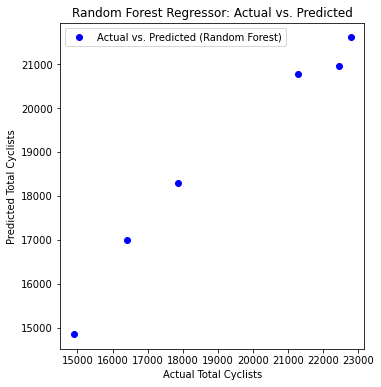

In [19]:
# Visualize results for Random Forest Regressor (Actual vs. Predicted)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, color='blue', label='Actual vs. Predicted (Random Forest)')
plt.xlabel('Actual Total Cyclists')
plt.ylabel('Predicted Total Cyclists')
plt.title('Random Forest Regressor: Actual vs. Predicted')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


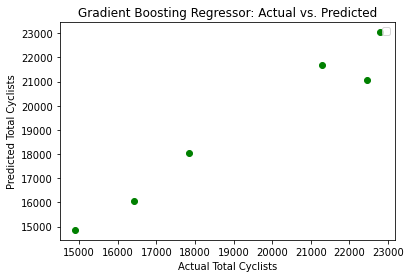

In [20]:
# Visualize results for Gradient Boosting Regressor (Actual vs. Predicted)

plt.scatter(y_test, gb_predictions, color='green')
plt.xlabel('Actual Total Cyclists')
plt.ylabel('Predicted Total Cyclists')
plt.title('Gradient Boosting Regressor: Actual vs. Predicted')
plt.legend()
plt.show()

## Hyperparameter tuning

In [21]:
# Define hyperparameters grid for Random Forest Regressor
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Define hyperparameters grid for Gradient Boosting Regressor
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Initialize Random Forest Regressor and perform Grid Search
rf_regressor = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters for Random Forest Regressor
best_rf_params = rf_grid_search.best_params_

# Initialize Gradient Boosting Regressor and perform Grid Search
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb_regressor, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters for Gradient Boosting Regressor
best_gb_params = gb_grid_search.best_params_

# Refit both models with the best parameters
best_rf_regressor = RandomForestRegressor(**best_rf_params, random_state=42)
best_gb_regressor = GradientBoostingRegressor(**best_gb_params, random_state=42)

best_rf_regressor.fit(X_train_scaled, y_train)
best_gb_regressor.fit(X_train_scaled, y_train)

# Make predictions using the best models
rf_predictions = best_rf_regressor.predict(X_test_scaled)
gb_predictions = best_gb_regressor.predict(X_test_scaled)

# Calculate metrics for the tuned models
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Print the metrics for the tuned models
print("Tuned Random Forest Regressor Metrics:")
print(f'MSE: {rf_mse}')
print(f'R-Squared (R2): {rf_r2}')
print(f'Best Hyperparameters: {best_rf_params}')

print("\nTuned Gradient Boosting Regressor Metrics:")
print(f'MSE: {gb_mse}')
print(f'R-Squared (R2): {gb_r2}')
print(f'Best Hyperparameters: {best_gb_params}')

Tuned Random Forest Regressor Metrics:
MSE: 631687.0902814803
R-Squared (R2): 0.9322434944017571
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}

Tuned Gradient Boosting Regressor Metrics:
MSE: 383171.11416386237
R-Squared (R2): 0.9589000058076859
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


In [23]:
# Save the data to a new CSV file
df.to_csv('new.csv', index=False)